# Beautiful Photometry

* [GitHub]()

A set of tools to compute lighting photometric data and generate beautiful graphics. This is a work in progress.

It is based on the Colour Science library ([GitHub](https://github.com/colour-science/colour)) ([Docs](https://www.colour-science.org/)). 

In [1]:
# First, some boilerplate code just to run this notebook

# displays plots in this notebook
%matplotlib inline 

# Since we are in the ./examples folder, add the root folder (../) to the path
import sys
sys.path.append('../')

# Colour Science Library
import colour  

In [2]:
from src.spectrum import import_spd

# Get the SPDs
incandescent = import_spd('../CSVs/incandescent.csv', 'Incandescent', normalize=True)
halogen = import_spd('../CSVs/halogen.csv', 'Halogen', normalize=True)
led2700 = import_spd('../CSVs/led2700.csv', '2700 K LED', normalize=True)

# Print the CRI
incandescent_cri = colour.colour_rendering_index(incandescent)
halogen_cri = colour.colour_rendering_index(halogen)
led2700_cri = colour.colour_rendering_index(led2700)

print('Incandescent CRI:', incandescent_cri)
print('Halogen CRI:', halogen_cri)
print('2700 K LED CRI:', led2700_cri)

/usr/local/lib/python3.7/site-packages/colour/utilities/verbose.py:141: ColourWarning: "domain" and "range" variables have different size, "range" variable will be resized to "domain" variable shape!
  warn(*args, **kwargs)


Incandescent CRI: 99.66330163341371
Halogen CRI: 99.37163968223544
2700 K LED CRI: 83.15852108174789


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


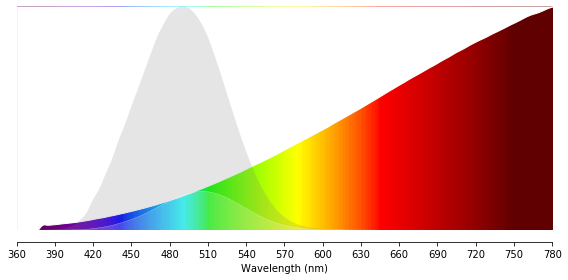

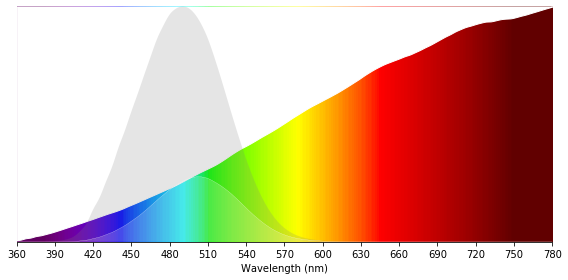

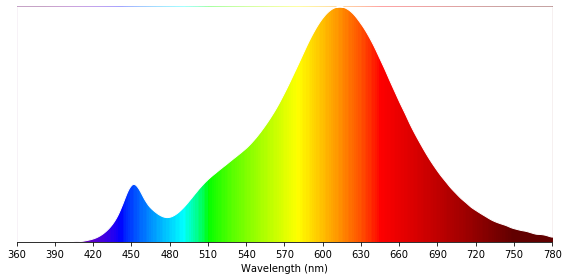

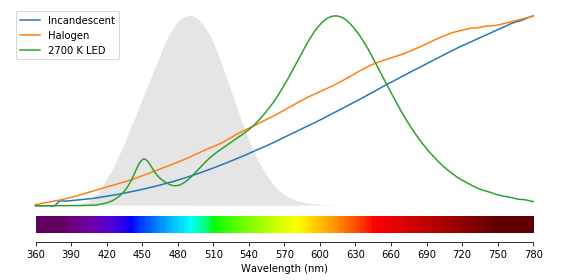

In [3]:
from src.plot import plot_spectrum, plot_multi_spectrum

plot_spectrum(incandescent, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True)
plot_spectrum(halogen, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/halogen.png')
plot_spectrum(led2700, hideyaxis=True)

plot_multi_spectrum([incandescent, halogen, led2700], melanopic_curve=True, hideyaxis=True)

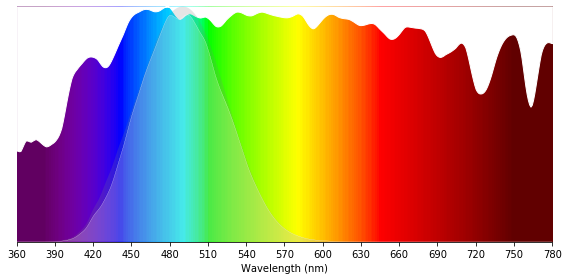

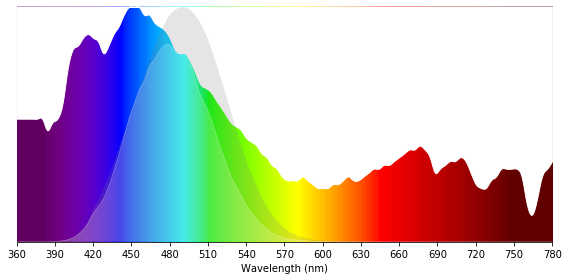

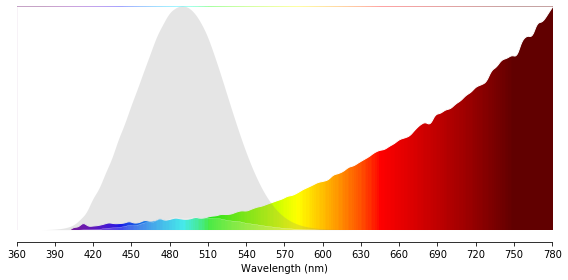

In [4]:
# Get the SPDs
daylight = import_spd('../CSVs/daylight.csv', 'Daylight', normalize=True)
night = import_spd('../CSVs/moonlight.csv', 'Night', normalize=True)
candle = import_spd('../CSVs/candle.csv', 'Fire', normalize=True)

plot_spectrum(daylight, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/daylight.png')
plot_spectrum(night, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/night.png')
plot_spectrum(candle, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/candle.png')

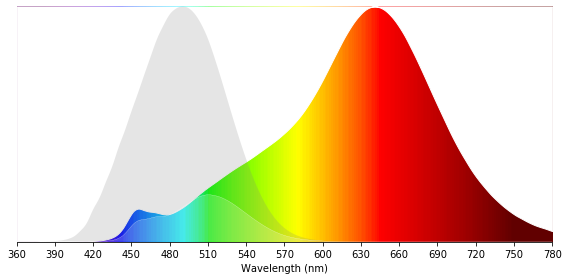

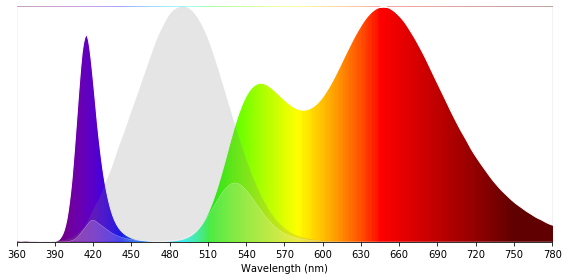

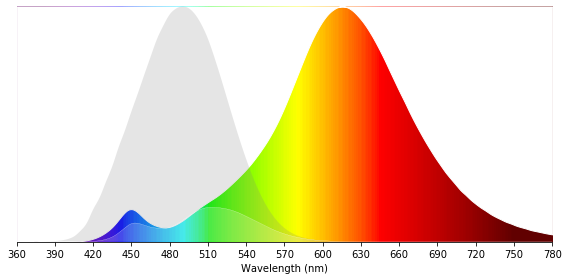

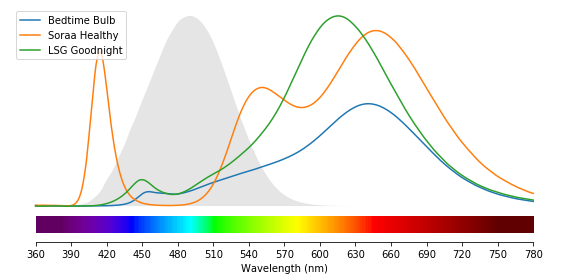

In [5]:
# Bedtime Bulb Comparison

bedtimebulb = import_spd('../CSVs/bedtime_bulb.csv', 'Bedtime Bulb', normalize=True)
bedtimebulbweighted = import_spd('../CSVs/bedtime_bulb.csv', 'Bedtime Bulb', normalize=True, weight=350/650)

soraa = import_spd('../CSVs/soraa.csv', 'Soraa Healthy', normalize=True)
soraaweighted = import_spd('../CSVs/soraa.csv', 'Soraa Healthy', normalize=True, weight=600/650)

lsg = import_spd('../CSVs/lsg.csv', 'LSG Goodnight', normalize=True)
lsgweighted = lsg

plot_spectrum(bedtimebulb, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/Bedtime Bulb Spectrum.png')
plot_spectrum(soraa, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True)
plot_spectrum(lsg, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True)
plot_multi_spectrum([bedtimebulbweighted, soraaweighted, lsgweighted], melanopic_curve=True, hideyaxis=True, filename='../out/Low Blue Comparison.png')

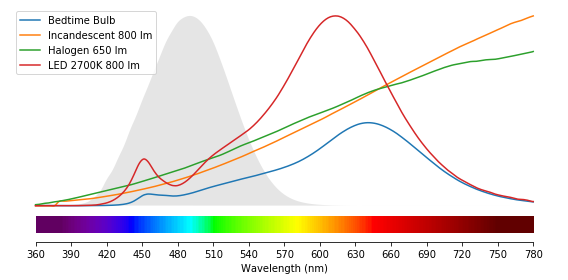

In [6]:
bedtimebulbweighted = import_spd('../CSVs/bedtime_bulb.csv', 'Bedtime Bulb', normalize=True, weight=350/800)
halogenweighted = import_spd('../CSVs/halogen.csv', 'Halogen 650 lm', normalize=True, weight=650/800)
incandescent = import_spd('../CSVs/incandescent.csv', 'Incandescent 800 lm', normalize=True)
led2700 = import_spd('../CSVs/led2700.csv', 'LED 2700K 800 lm', normalize=True)

plot_multi_spectrum([bedtimebulbweighted, incandescent, halogenweighted, led2700], melanopic_curve=True, hideyaxis=True, filename='../out/Traditional Source Comparison.png')

In [7]:
# Melanopic Ratio
from src.human_circadian import melanopic_ratio, melanopic_response, melanopic_lumens, melanopic_photopic_ratio
from src.human_visual import scotopic_photopic_ratio

print('melanopic response')
print(melanopic_response(bedtimebulb))
print(melanopic_response(incandescent))
print(melanopic_response(halogen))
print(melanopic_response(led2700))

print('melanopic ratio')
print(melanopic_ratio(bedtimebulb))
print(melanopic_ratio(incandescent))
print(melanopic_ratio(halogen))
print(melanopic_ratio(led2700))

print('melanopic lumens')
print(melanopic_lumens(bedtimebulb, 350))
print(melanopic_lumens(incandescent, 800))
print(melanopic_lumens(halogen, 650))
print(melanopic_lumens(led2700, 800))

print('s/p ratio')
print(scotopic_photopic_ratio(bedtimebulb))
print(scotopic_photopic_ratio(incandescent))
print(scotopic_photopic_ratio(halogen))
print(scotopic_photopic_ratio(led2700))

print('m/p ratio')
print(melanopic_photopic_ratio(bedtimebulb))
print(melanopic_photopic_ratio(incandescent))
print(melanopic_photopic_ratio(halogen))
print(melanopic_photopic_ratio(led2700))

melanopic response
15.8
14.3
23.0
19.0
melanopic ratio
0.39
0.48
0.55
0.38
melanopic lumens
136
383
359
302
s/p ratio
0.43
0.51
0.57
0.43
m/p ratio
0.32
0.39
0.45
0.31


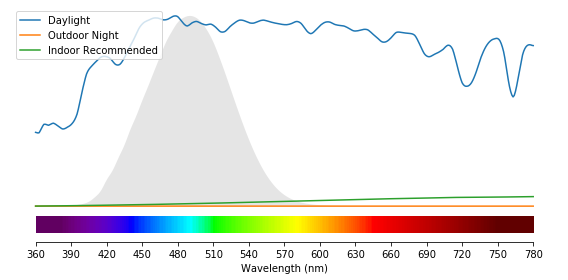

In [8]:
# Indoor vs. Outdoor light
daylight = import_spd('../CSVs/daylight.csv', 'Daylight', normalize=True) # ~10,000 lux
night = import_spd('../CSVs/moonlight.csv', 'Outdoor Night', normalize=True, weight=0.32/10000) # 0.32 lux
indoor = import_spd('../CSVs/halogen.csv', 'Indoor Recommended', normalize=True, weight=500/10000) # 500 lux, indoor halogen
plot_multi_spectrum([daylight, night, indoor], melanopic_curve=True, hideyaxis=True, filename='../out/Indoor vs Outdoor.png')

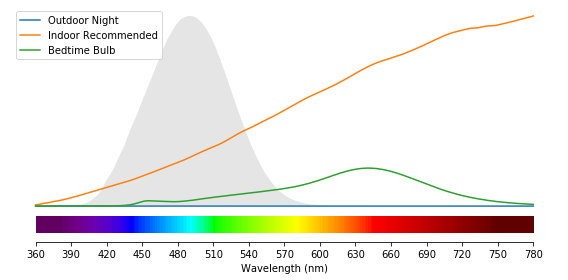

In [9]:
# Interior vs. nighttime light
night = import_spd('../CSVs/moonlight.csv', 'Outdoor Night', normalize=True, weight=0.32/500) # 0.32 lux
indoor = import_spd('../CSVs/halogen.csv', 'Indoor Recommended', normalize=True) # 500 lux, indoor halogen
bedtimebulbweighted = import_spd('../CSVs/bedtime_bulb.csv', 'Bedtime Bulb', normalize=True, weight=100/500) # 100 lux
plot_multi_spectrum([night, indoor, bedtimebulbweighted], melanopic_curve=True, hideyaxis=True, filename='../out/Indoor Comparison.png')

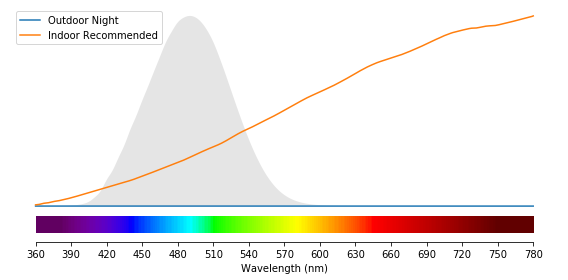

In [10]:
plot_multi_spectrum([night, indoor], melanopic_curve=True, hideyaxis=True, filename='../out/Indoor Comparison no BB.png')

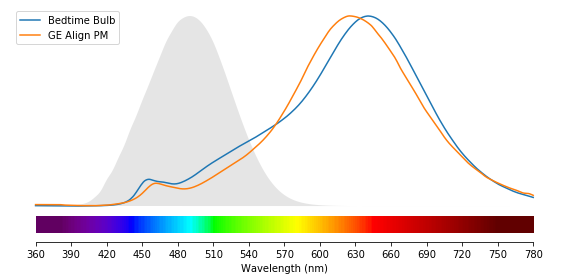

In [11]:
# GE Align PM vs BB
gealignpm = import_spd('../CSVs/GE_Align_PM.csv', 'GE Align PM', normalize=True)
plot_multi_spectrum([bedtimebulb, gealignpm], melanopic_curve=True, hideyaxis=True)

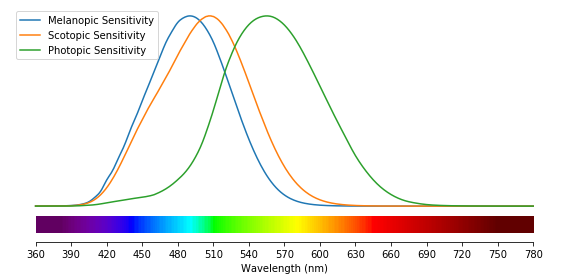

In [12]:
# S/P/M
from src.human_circadian import get_melanopic_curve
from src.human_visual import get_scotopic_curve, get_photopic_curve
plot_multi_spectrum([get_melanopic_curve(), get_scotopic_curve(), get_photopic_curve()], hideyaxis=True)



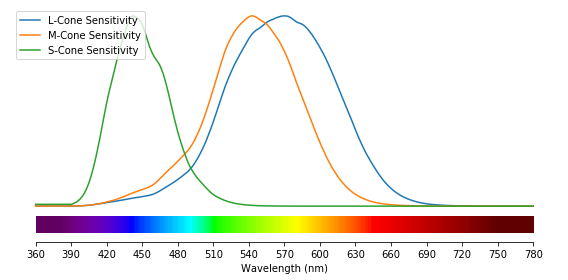

In [13]:
from src.human_visual import get_l_cone_curve, get_m_cone_curve, get_s_cone_curve
plot_multi_spectrum([get_l_cone_curve(), get_m_cone_curve(), get_s_cone_curve()], hideyaxis=True)

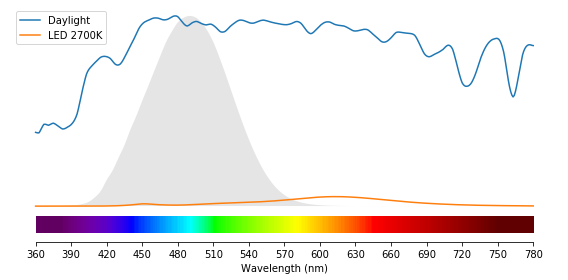

In [19]:
## Blue blockers article
# sunlight vs indoor 2700K LED
daylight = import_spd('../CSVs/daylight.csv', 'Daylight', normalize=True) # ~10,000 lux
indoor = import_spd('../CSVs/led2700.csv', 'LED 2700K', normalize=True, weight=500/10000) # 500 lux, indoor halogen
plot_multi_spectrum([daylight, indoor], melanopic_curve=True, hideyaxis=True, filename='../out/Daylight vs 2700K.png')

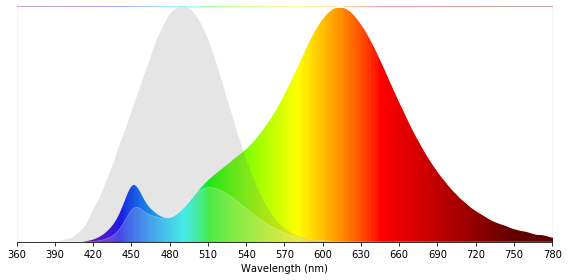

In [18]:
# 2700K LED
plot_spectrum(led2700, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/LED 2700K.png')

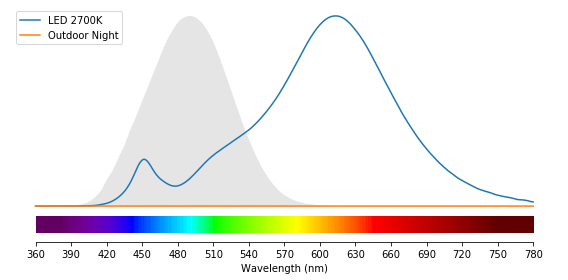

In [21]:
# moonlight vs 2700K LED
indoor = import_spd('../CSVs/led2700.csv', 'LED 2700K', normalize=True) # 500 lux, indoor halogen
night = import_spd('../CSVs/moonlight.csv', 'Outdoor Night', normalize=True, weight=0.32/500) # 0.32 lux
plot_multi_spectrum([indoor, night], melanopic_curve=True, hideyaxis=True, filename='../out/Moonlight vs 2700K.png')

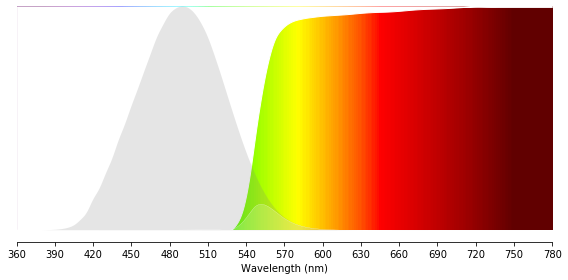

In [17]:
# Orange glasses
uvex = import_spd('../CSVs/filters/uvex_sct_orange.csv', 'Uvex', normalize=True)
plot_spectrum(uvex, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/Uvex SCT Orange.png')

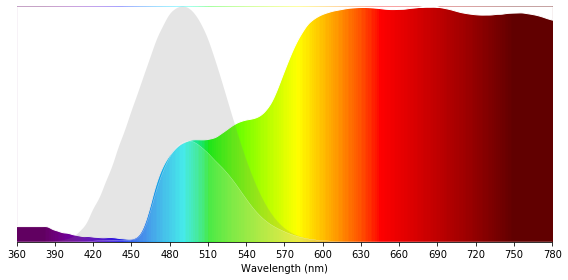

In [16]:
# Yellow glasses
gammaray = import_spd('../CSVs/filters/gamma_ray_computer_yellow.csv', 'Gamma Ray', normalize=True)
plot_spectrum(gammaray, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/Gamma Ray Yellow.png')

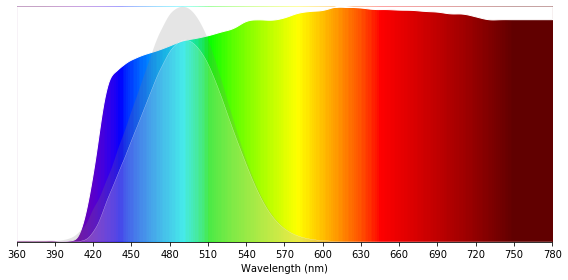

In [14]:
# Clear glasses
blutech = import_spd('../CSVs/filters/blutech_clear.csv', 'Blutech', normalize=True)
plot_spectrum(blutech, hideyaxis=True, melanopic_curve=True, melanopic_stimulus=True, filename='../out/Blutech Clear.png')